In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

# Imports

In [2]:
import sys
sys.executable

'/Users/tudorl/Documents/workspace/personal/dtreeviz/venv/bin/python'

In [3]:
%connect_info

{
  "shell_port": 58279,
  "iopub_port": 58280,
  "stdin_port": 58281,
  "control_port": 58283,
  "hb_port": 58282,
  "ip": "127.0.0.1",
  "key": "e56420fb-47e26ab9e5fe32ddce4fe032",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-cbdb4231-a7b4-4f1b-a8dc-6cdb6cd3c4e2.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [4]:
import sys
import os
# add library module to PYTHONPATH
sys.path.append(f"{os.getcwd()}/../")

import sklearn
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
import xgboost as xgb
from xgboost import plot_importance, plot_tree, plotting

from dtreeviz import trees 
from dtreeviz import treeviz

import graphviz
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams

import pandas as pd
import numpy as np
from dtreeviz.models.shadow_decision_tree import ShadowDecTree3
from dtreeviz.models.xgb_decision_tree import XGBDTree
from dtreeviz import treeviz
from dtreeviz import exceptions

In [5]:
treeviz.add(1,2)

3

In [6]:
pd.options.display.max_rows = 999

In [7]:
import xgboost as xgb

In [8]:
??xgb.XGBClassifier

# Train

In [9]:
random_state = 1234
dataset = pd.read_csv("../data/titanic/titanic.csv")
# Fill missing values for Age
dataset.fillna({"Age":dataset.Age.mean()}, inplace=True)
# Encode categorical variables
dataset["Sex_label"] = dataset.Sex.astype("category").cat.codes
dataset["Cabin_label"] = dataset.Cabin.astype("category").cat.codes
dataset["Embarked_label"] = dataset.Embarked.astype("category").cat.codes
features = ["Pclass", "Age", "Fare", "Sex_label", "Cabin_label", "Embarked_label"]
target = "Survived"

In [10]:
dtrain = xgb.DMatrix(dataset[features], dataset[target])

In [11]:
params = {"max_depth":10, "eta":0.05, "objective":"binary:logistic", "subsample":1}
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=8)

In [22]:
import json

In [23]:
config = json.loads(xgb_model.save_config())
print(config)

{'learner': {'generic_param': {'enable_experimental_json_serialization': '0', 'gpu_id': '-1', 'gpu_page_size': '0', 'n_gpus': '0', 'n_jobs': '0', 'nthread': '0', 'random_state': '0', 'seed': '0', 'seed_per_iteration': '0', 'validate_features': '0', 'validate_parameters': '1'}, 'gradient_booster': {'gbtree_train_param': {'num_parallel_tree': '1', 'predictor': 'auto', 'process_type': 'default', 'tree_method': 'exact', 'updater': 'grow_colmaker,prune', 'updater_seq': 'grow_colmaker,prune'}, 'name': 'gbtree', 'specified_updater': False, 'updater': {'grow_colmaker': {'colmaker_train_param': {'opt_dense_col': '1'}, 'train_param': {'alpha': '0', 'cache_opt': '1', 'colsample_bylevel': '1', 'colsample_bynode': '1', 'colsample_bytree': '1', 'default_direction': 'learn', 'enable_feature_grouping': '0', 'eta': '0.0500000007', 'gamma': '0', 'grow_policy': 'depthwise', 'interaction_constraints': '', 'lambda': '1', 'learning_rate': '0.0500000007', 'max_bin': '256', 'max_conflict_rate': '0', 'max_delt

In [24]:
config["learner"]["objective"]["name"]

'binary:logistic'

In [15]:
params_reg = {"max_depth":10, "eta":0.05, "objective":"reg:squarederror", "subsample":1}
xgb_model_Reg = xgb.train(params=params_reg, dtrain=dtrain, num_boost_round=8)

In [16]:
config = json.loads(xgb_model_Reg.save_config())
print(config)

{'learner': {'generic_param': {'enable_experimental_json_serialization': '0', 'gpu_id': '-1', 'gpu_page_size': '0', 'n_gpus': '0', 'n_jobs': '0', 'nthread': '0', 'random_state': '0', 'seed': '0', 'seed_per_iteration': '0', 'validate_features': '0', 'validate_parameters': '1'}, 'gradient_booster': {'gbtree_train_param': {'num_parallel_tree': '1', 'predictor': 'auto', 'process_type': 'default', 'tree_method': 'exact', 'updater': 'grow_colmaker,prune', 'updater_seq': 'grow_colmaker,prune'}, 'name': 'gbtree', 'specified_updater': False, 'updater': {'grow_colmaker': {'colmaker_train_param': {'opt_dense_col': '1'}, 'train_param': {'alpha': '0', 'cache_opt': '1', 'colsample_bylevel': '1', 'colsample_bynode': '1', 'colsample_bytree': '1', 'default_direction': 'learn', 'enable_feature_grouping': '0', 'eta': '0.0500000007', 'gamma': '0', 'grow_policy': 'depthwise', 'interaction_constraints': '', 'lambda': '1', 'learning_rate': '0.0500000007', 'max_bin': '256', 'max_conflict_rate': '0', 'max_delt

In [21]:
config["learner"]["objective"]["name"]

'reg:squarederror'

In [12]:
dir(xgb_model_Reg)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_validate_features',
 'attr',
 'attributes',
 'best_iteration',
 'best_ntree_limit',
 'boost',
 'booster',
 'copy',
 'dump_model',
 'eval',
 'eval_set',
 'feature_names',
 'feature_types',
 'get_dump',
 'get_fscore',
 'get_score',
 'get_split_value_histogram',
 'handle',
 'load_config',
 'load_model',
 'load_rabit_checkpoint',
 'predict',
 'save_config',
 'save_model',
 'save_rabit_checkpoint',
 'save_raw',
 'set_attr',
 'set_param',
 'trees_to_dataframe',
 'update']

In [13]:
xgb_model_Reg.attributes()

{}

In [14]:
xgb_model_Reg.__getattribute__("feature_names")

['Pclass', 'Age', 'Fare', 'Sex_label', 'Cabin_label', 'Embarked_label']

In [21]:
xgb_model_Reg.__dict__

{'feature_names': ['Pclass',
  'Age',
  'Fare',
  'Sex_label',
  'Cabin_label',
  'Embarked_label'],
 'feature_types': ['int', 'float', 'float', 'int', 'int', 'int'],
 'handle': c_void_p(140666973004720),
 'booster': 'gbtree',
 'best_iteration': 7,
 'best_ntree_limit': 8}

In [23]:
xgb_model_Reg.__getattribute__("handle")

c_void_p(140666973004720)

In [25]:
xgb_model_Reg.__getstate__()["handle"]

bytearray(b'CONFIG-offset:L\xe8\x00\x00\x00\x00\x00\x00\x00\x00\x00?\x06\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x10\x00\x00\x00\x00\x00\x00\x00reg:squarederror\x06\x00\x00\x00\x00\x00\x00\x00gbtree\x08\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

In [119]:
xgb_model.__getstate__()

{'feature_names': ['Pclass',
  'Age',
  'Fare',
  'Sex_label',
  'Cabin_label',
  'Embarked_label'],
 'feature_types': ['int', 'float', 'float', 'int', 'int', 'int'],
 'handle': bytearray(b'CONFIG-offset:2^\x00\x00\x00\x00\x00\x00\x00\x00\x00?\x06\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0f\x00\x00\x00\x00\x00\x00\x00binary:logistic\x06\x00\x00\x00\x00\x00\x00\x00gbtree\x08\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

In [120]:
??xgb_model.__getstate__

In [134]:
xgb_model.__getattribute__("handle")

c_void_p(140204703336032)

In [138]:
xgb_model.handle

c_void_p(140204703336032)

In [116]:
dir(xgb_model)

['__class__',
 '__copy__',
 '__deepcopy__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_validate_features',
 'attr',
 'attributes',
 'best_iteration',
 'best_ntree_limit',
 'boost',
 'booster',
 'copy',
 'dump_model',
 'eval',
 'eval_set',
 'feature_names',
 'feature_types',
 'get_dump',
 'get_fscore',
 'get_score',
 'get_split_value_histogram',
 'handle',
 'load_config',
 'load_model',
 'load_rabit_checkpoint',
 'predict',
 'save_config',
 'save_model',
 'save_rabit_checkpoint',
 'save_raw',
 'set_attr',
 'set_param',
 'trees_to_dataframe',
 'update']

In [9]:
xgb_model.trees_to_dataframe().query("Tree == 0")

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover
0,0,0,0-0,Sex_label,1.0,0-1,0-2,0-1,246.604279,222.75
1,0,1,0-1,Pclass,3.0,0-3,0-4,0-3,60.127525,78.50
2,0,2,0-2,Cabin_label,4.0,0-5,0-6,0-5,29.516968,144.25
3,0,3,0-3,Leaf,NaN,NaN,NaN,NaN,0.087356,42.50
4,0,4,0-4,Leaf,NaN,NaN,NaN,NaN,-0.000000,36.00
5,0,5,0-5,Leaf,NaN,NaN,NaN,NaN,-0.072327,118.25
6,0,6,0-6,Leaf,NaN,NaN,NaN,NaN,-0.012963,26.00


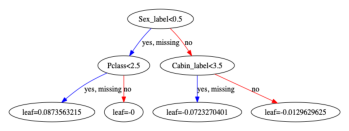

In [10]:
# rcParams['figure.figsize'] = 50,30
plot_tree(xgb_model)

# save the model

In [11]:
import joblib
# joblib.dump(xgb_model, "xgb_model")

# Init shadow tree

In [16]:
from dtreeviz.models.xgb_decision_tree import XGBDTree


In [17]:
d = dataset[features+ [target]].iloc[:800]
d_matrix = xgb.DMatrix(d)

In [18]:
xgb_shadow = XGBDTree(xgb_model, 1, d[features], d[target], features, target, class_names=[0, 1])

In [19]:
isinstance(xgb_shadow, ShadowDecTree3)

True

# Parameters meaning
- cover https://stackoverflow.com/questions/33520460/how-is-xgboost-cover-calculated
- https://rdrr.io/cran/xgboost/man/xgb.model.dt.tree.html
- https://eli5.readthedocs.io/en/latest/tutorials/index.html

## left, right children

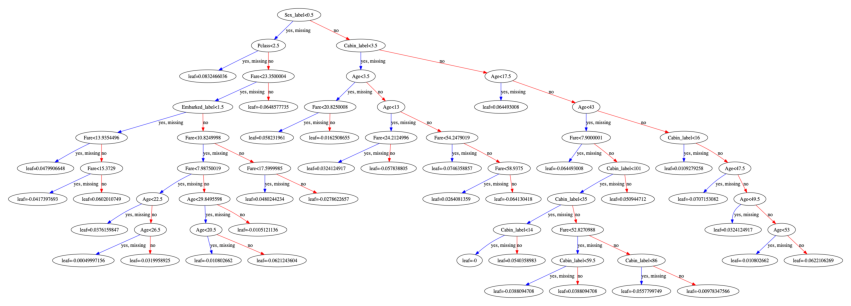

In [31]:
rcParams['figure.figsize'] = 15,10
plot_tree(xgb_model, num_trees=1)

In [21]:
[node.id for node in xgb_shadow.internal]

[1, 2, 0]

In [22]:
[node.id for node in xgb_shadow.leaves]

[3, 4, 5, 6]

## Node split/threshold

In [23]:
??plot_tree

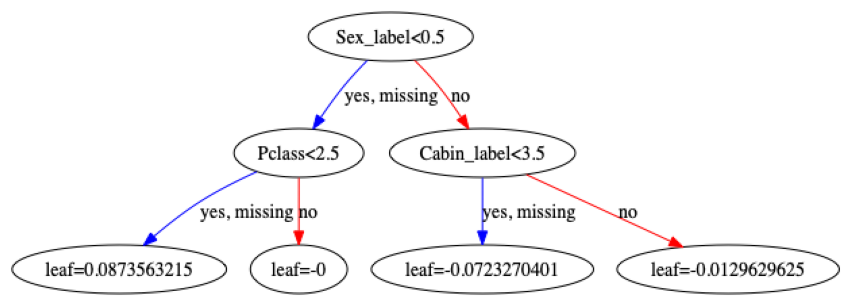

In [24]:
rcParams['figure.figsize'] = 15,10
plot_tree(xgb_model, num_trees=0)

In [26]:
#??xgb_model.get_dump

In [30]:
xgb_model.get_dump(dump_format="text")[1]

'0:[Sex_label<1] yes=1,no=2,missing=1\n\t1:[Pclass<3] yes=3,no=4,missing=3\n\t\t3:leaf=0.0832466036\n\t\t4:leaf=-0\n\t2:[Cabin_label<4] yes=5,no=6,missing=5\n\t\t5:leaf=-0.0688317642\n\t\t6:leaf=-0.0123393293\n'

In [60]:
xgb_model.get_dump(dump_format="json")[1]

'  { "nodeid": 0, "depth": 0, "split": "Sex_label", "split_condition": 1, "yes": 1, "no": 2, "missing": 1 , "children": [\n    { "nodeid": 1, "depth": 1, "split": "Pclass", "split_condition": 3, "yes": 3, "no": 4, "missing": 3 , "children": [\n      { "nodeid": 3, "leaf": 0.0832466036 }, \n      { "nodeid": 4, "leaf": -0 }\n    ]}, \n    { "nodeid": 2, "depth": 1, "split": "Cabin_label", "split_condition": 4, "yes": 5, "no": 6, "missing": 5 , "children": [\n      { "nodeid": 5, "leaf": -0.0688317642 }, \n      { "nodeid": 6, "leaf": -0.0123393293 }\n    ]}\n  ]}'

In [27]:
xgb_model.get_dump(dump_format="dot")[1]

'digraph {\n    graph [ rankdir=TB ]\n\n    0 [ label="Sex_label<0.5" ]\n    0 -> 1 [label="yes, missing" color="#0000FF"]\n    0 -> 2 [label="no" color="#FF0000"]\n\n    1 [ label="Pclass<2.5" ]\n    1 -> 3 [label="yes, missing" color="#0000FF"]\n    1 -> 4 [label="no" color="#FF0000"]\n\n    3 [ label="leaf=0.0832466036" ]\n\n    4 [ label="leaf=-0" ]\n\n    2 [ label="Cabin_label<3.5" ]\n    2 -> 5 [label="yes, missing" color="#0000FF"]\n    2 -> 6 [label="no" color="#FF0000"]\n\n    5 [ label="leaf=-0.0688317642" ]\n\n    6 [ label="leaf=-0.0123393293" ]\n}'

In [31]:
xgb_model.trees_to_dataframe().query(f"Tree ==1")

,Tree,Node,ID,Feature,Split,Yes,No,Missing,Gain,Cover
7,1,0,1-0,Sex_label,1.0,1-1,1-2,1-1,223.169312,222.513412
8,1,1,1-1,Pclass,3.0,1-3,1-4,1-3,54.557060,78.419022
9,1,2,1-2,Cabin_label,4.0,1-5,1-6,1-5,26.723022,144.094391
10,1,3,1-3,Leaf,NaN,NaN,NaN,NaN,0.083247,42.419022
11,1,4,1-4,Leaf,NaN,NaN,NaN,NaN,-0.000000,36.000000
12,1,5,1-5,Leaf,NaN,NaN,NaN,NaN,-0.068832,118.095490
13,1,6,1-6,Leaf,NaN,NaN,NaN,NaN,-0.012339,25.998909


In [32]:
xgb_shadow._get_column_value("Split")

array([ 1.,  3.,  4., nan, nan, nan, nan])

In [33]:
[node.split() for node in xgb_shadow.leaves], [node.split() for node in xgb_shadow.internal]

([-2, -2, -2, -2], [3.0, 4.0, 1.0])

In [34]:
xgb_shadow.get_node_split(0)

1.0

## Node feature

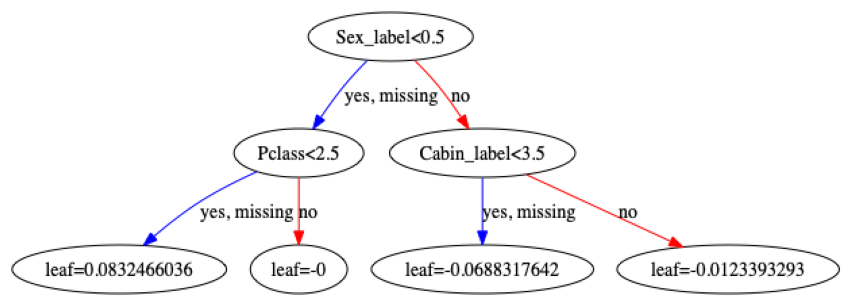

In [20]:
rcParams['figure.figsize'] = 15,10
plot_tree(xgb_model, num_trees=1)

In [165]:
xgb_model.feature_names

['Pclass', 'Age', 'Fare', 'Sex_label', 'Cabin_label', 'Embarked_label']

In [166]:
[(node.id, node.feature()) for node in xgb_shadow.leaves], [(node.id, node.feature()) for node in xgb_shadow.internal]

([(3, -2), (7, -2), (8, -2), (9, -2), (10, -2), (11, -2), (12, -2)],
 [(4, 2), (1, 0), (5, 1), (6, 1), (2, 4), (0, 3)])

## node to samples

In [168]:
xgb_shadow.get_node_samples()

defaultdict(list,
            {10: [0, 4, 5, 12, 13, 17],
             5: [0, 4, 5, 7, 12, 13, 16, 17],
             2: [0, 4, 5, 6, 7, 12, 13, 16, 17],
             0: [0,
              1,
              2,
              3,
              4,
              5,
              6,
              7,
              8,
              9,
              10,
              11,
              12,
              13,
              14,
              15,
              16,
              17,
              18,
              19],
             3: [1, 3, 9, 11, 15],
             1: [1, 2, 3, 8, 9, 10, 11, 14, 15, 18, 19],
             7: [2, 8, 10, 14, 18, 19],
             4: [2, 8, 10, 14, 18, 19],
             12: [6],
             6: [6],
             9: [7, 16]})

In [171]:
xgb_shadow.get_node_samples()[0]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

## Node nsample

In [173]:
[(node.id, node.nsamples()) for node in xgb_shadow.leaves], [(node.id, node.nsamples()) for node in xgb_shadow.internal]


([(3, 5), (7, 6), (8, 0), (9, 2), (10, 6), (11, 0), (12, 1)],
 [(4, 6), (1, 11), (5, 8), (6, 1), (2, 9), (0, 20)])

## n_sample_classes

In [201]:
[node.n_sample_classes() for node in xgb_shadow.leaves]

[[0, 5], [2, 4], [0, 0], [2, 0], [5, 1], [0, 0], [1, 0]]

## is classifier

# Visualisations classifier

## viz_leaf_samples

In [21]:
%connect_info


{
  "shell_port": 60724,
  "iopub_port": 60725,
  "stdin_port": 60726,
  "control_port": 60728,
  "hb_port": 60727,
  "ip": "127.0.0.1",
  "key": "11bc30ae-62bb6964ce4fee75dea25fb9",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-e491a098-19bb-479b-9559-930260ddb1a4.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.


In [1]:
treeviz.viz_leaf_samples(xgb_model, d[features], d[target], features, target, class_names=[0, 1], tree_index=1)

NameError: name 'treeviz' is not defined

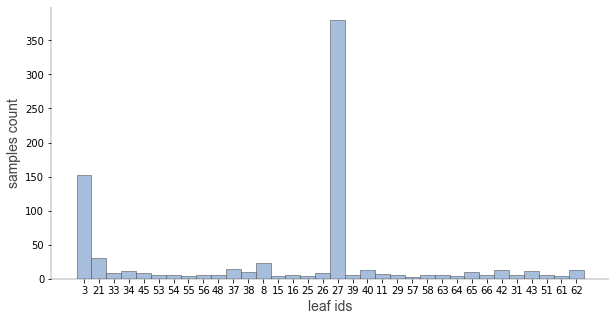

In [16]:
treeviz.viz_leaf_samples(xgb_shadow)

## ctreeviz_leaf_samples

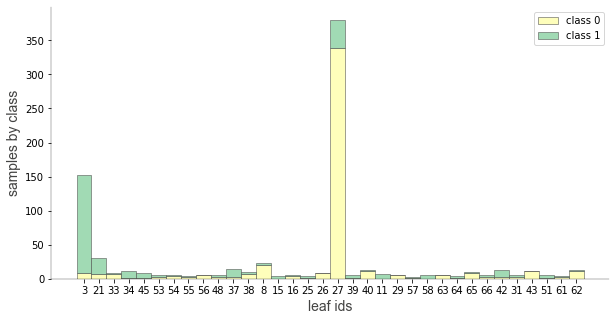

In [17]:
treeviz.ctreeviz_leaf_samples(xgb_model, d[features], d[target], features, target, class_names=[0, 1], tree_index=1  )

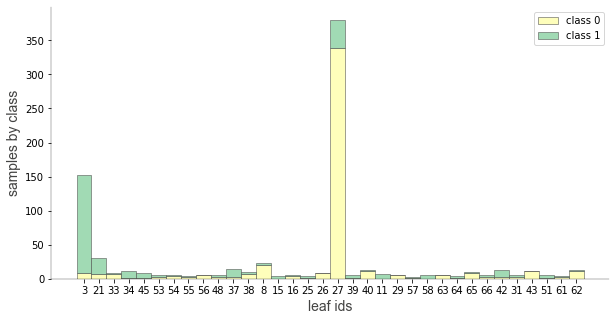

In [18]:
treeviz.ctreeviz_leaf_samples(xgb_shadow)

## dtreeviz

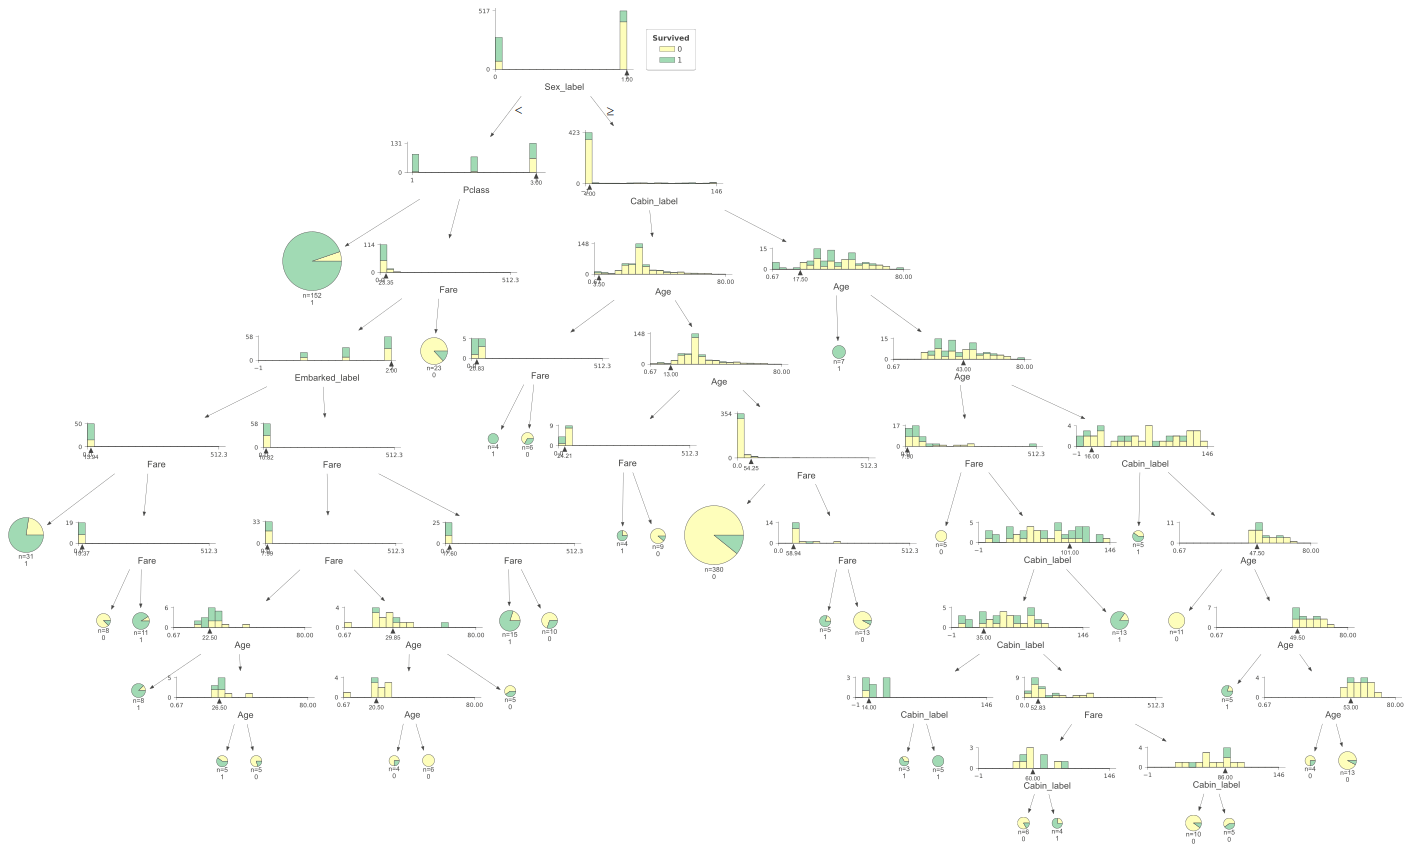

In [19]:
treeviz.dtreeviz(xgb_model, d[features], d[target], features, target, class_names=[0, 1], tree_index=1)

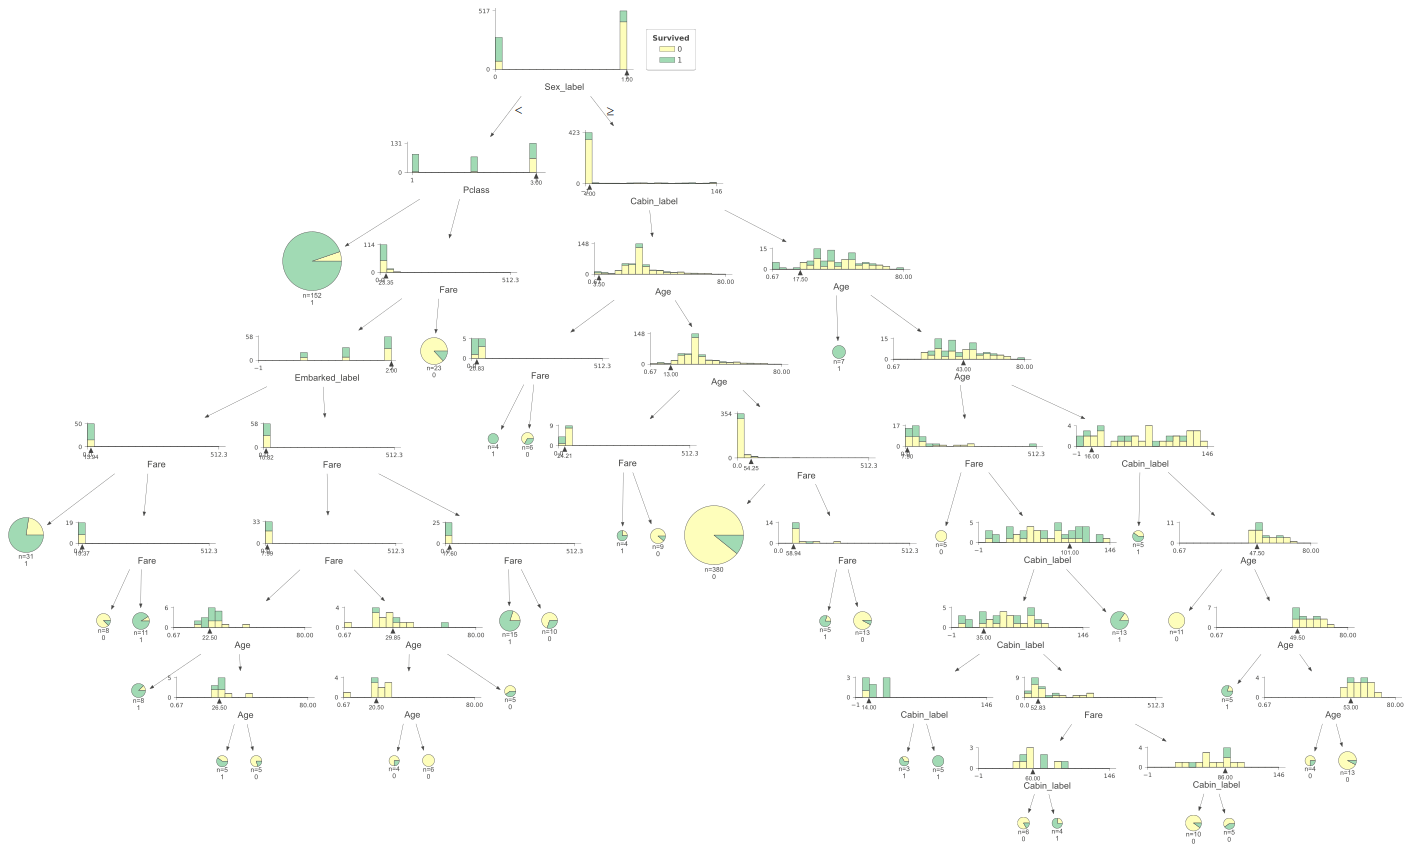

In [20]:
treeviz.dtreeviz(xgb_shadow)

## describe_node_sample

In [41]:
d[features]

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label
0,3,22.000000,7.2500,1,-1,2
1,1,38.000000,71.2833,0,81,0
2,3,26.000000,7.9250,0,-1,2
3,1,35.000000,53.1000,0,55,2
4,3,35.000000,8.0500,1,-1,2
5,3,29.699118,8.4583,1,-1,1
6,1,54.000000,51.8625,1,129,2
7,3,2.000000,21.0750,1,-1,2
8,3,27.000000,11.1333,0,-1,2
9,2,14.000000,30.0708,0,-1,0


In [71]:
treeviz.describe_node_sample(xgb_model, 1, d[features], features, tree_index=1)

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label
count,11.000000,11.000000,11.000000,11.0,11.000000,11.000000
mean,2.272727,30.154465,24.167418,0.0,29.363636,1.454545
std,0.904534,16.467629,20.603166,0.0,48.512416,0.934199
min,1.000000,4.000000,7.225000,0.0,-1.000000,0.000000
25%,1.500000,20.000000,9.529150,0.0,-1.000000,1.000000
50%,3.000000,29.699118,16.700000,0.0,-1.000000,2.000000
75%,3.000000,36.500000,28.310400,0.0,52.000000,2.000000
max,3.000000,58.000000,71.283300,0.0,145.000000,2.000000


In [72]:
treeviz.describe_node_sample(xgb_shadow, 1)

,Pclass,Age,Fare,Sex_label,Cabin_label,Embarked_label
count,11.000000,11.000000,11.000000,11.0,11.000000,11.000000
mean,2.272727,30.154465,24.167418,0.0,29.363636,1.454545
std,0.904534,16.467629,20.603166,0.0,48.512416,0.934199
min,1.000000,4.000000,7.225000,0.0,-1.000000,0.000000
25%,1.500000,20.000000,9.529150,0.0,-1.000000,1.000000
50%,3.000000,29.699118,16.700000,0.0,-1.000000,2.000000
75%,3.000000,36.500000,28.310400,0.0,52.000000,2.000000
max,3.000000,58.000000,71.283300,0.0,145.000000,2.000000


## explain_prediction_path

In [82]:
dataset[features].iloc[5]

Pclass             3.000000
Age               29.699118
Fare               8.458300
Sex_label          1.000000
Cabin_label       -1.000000
Embarked_label     1.000000
Name: 5, dtype: float64

In [94]:
treeviz.explain_prediction_path(xgb_model, dataset[features].iloc[5], "plain_english", d[features], d[target], features, target, tree_index=1)


3.5 <= Age
Fare < 54.25
1.0 <= Sex_label
Cabin_label < 4.0


In [93]:
treeviz.explain_prediction_path(xgb_shadow, dataset[features].iloc[5], explanation_type="plain_english")

3.5 <= Age
Fare < 54.25
1.0 <= Sex_label
Cabin_label < 4.0


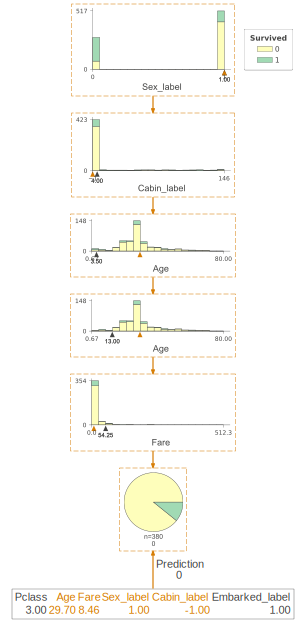

In [92]:
treeviz.dtreeviz(xgb_model, d[features], d[target], features, target, class_names=[0, 1], tree_index=1, show_just_path=True, X=dataset[features].iloc[5] )

# Visualisations regressor

In [1]:
%connect_info


{
  "shell_port": 60724,
  "iopub_port": 60725,
  "stdin_port": 60726,
  "control_port": 60728,
  "hb_port": 60727,
  "ip": "127.0.0.1",
  "key": "11bc30ae-62bb6964ce4fee75dea25fb9",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-e491a098-19bb-479b-9559-930260ddb1a4.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
